<h1>Задание 2</h1>

Реализовать вторую версию программы построения частотного словаря, в которой для нормализации используется стеммер (найти необходимую библиотеку самостоятельно). Сравнить построенные частотные словари. (1 балла)

In [170]:
#!pip3 install PyStemmer

In [171]:
import Stemmer
stemmer = Stemmer.Stemmer('russian')
stemmer.stemWord('ковриков')

'коврик'

In [172]:
#!pip3 install snowballstemmer

import snowballstemmer

stemmer = snowballstemmer.stemmer('russian');
print(stemmer.stemWords("Я тебя люблю".split()));

<h2> Импорт библиотек </h2>

In [215]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

#Create stopwords list
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', 'к', 'на'])

In [216]:
punctuation += '...' + '—' + '«' + '»'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~...—«»'

<h2> Определение функций </h2>

In [217]:
def get_text(file_name):
    txt = ''
    with open(file_name) as f:
        for line in f:
            line = line.rstrip("\r\n")
            line = line.rstrip(".—")
            txt += line + ' '
    return(txt)

In [218]:
def get_sentences(text):
    split_regex = re.compile(r'[.|!|?|…]')
    sentences = filter(lambda t: t, [t.strip() for t in split_regex.split(text)])
    corpus = []
    for s in sentences:
        corpus.append(s)
    return(corpus)

In [219]:
#Preprocess function
def preprocess_text2(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    stemmed_tokens = stemmer.stemWords(tokens)
    filtered_tokens = []
    for word in stemmed_tokens:
        if (word not in russian_stopwords) and (word != " ") and (word not in punctuation):
            filtered_tokens.append(word)
    
    
    return filtered_tokens

<h2>Начало работы</h2>

In [220]:
txt = get_text('text.txt')
print(txt)
txt = get_sentences(txt)
txt = ' '.join(txt)

В середине августа, перед рождением молодого месяца, вдруг наступили отвратительные погоды, какие так свойственны северному побережью Черного моря. То по целым суткам тяжело лежал над землею и морем густой туман, и тогда огромная сирена на маяке ревела днем и ночью, точно бешеный бык. То с утра до утра шел не переставая мелкий, как водяная пыль, дождик, превращавший глинистые дороги и тропинки в сплошную густую грязь, в которой увязали надолго возы и экипажи. То задувал с северо-запада, со стороны степи свирепый ураган; от него верхушки деревьев раскачивались, пригибаясь и выпрямляясь, точно волны в бурю, гремели по ночам железные кровли дач, и казалось, будто кто-то бегает по ним в подкованных сапогах, вздрагивали оконные рамы, хлопали двери, и дико завывало в печных трубах. Несколько рыбачьих баркасов заблудилось в море, а два и совсем не вернулись: только спустя неделю повыбрасывало трупы рыбаков в разных местах берега Обитатели пригородного морского курорта — большей частью греки и

In [221]:
t = preprocess_text2(txt)

In [222]:
t

['середин',
 'август',
 'рожден',
 'молод',
 'месяц',
 'наступ',
 'отвратительн',
 'погод',
 'свойствен',
 'северн',
 'побереж',
 'черн',
 'мор',
 'цел',
 'сутк',
 'тяжел',
 'лежа',
 'земл',
 'мор',
 'густ',
 'тума',
 'тогд',
 'огромн',
 'сир',
 'маяк',
 'ревел',
 'днем',
 'ноч',
 'точн',
 'бешен',
 'бык',
 'утр',
 'утр',
 'шел',
 'перестав',
 'мелк',
 'водян',
 'пыл',
 'дождик',
 'превраща',
 'глинист',
 'дорог',
 'тропинк',
 'сплошн',
 'густ',
 'гряз',
 'котор',
 'увяза',
 'надолг',
 'воз',
 'экипаж',
 'задува',
 'северо-запад',
 'сторон',
 'степ',
 'свиреп',
 'урага',
 'нег',
 'верхушк',
 'дерев',
 'раскачива',
 'пригиб',
 'выпрямл',
 'точн',
 'волн',
 'бур',
 'гремел',
 'ноч',
 'железн',
 'кровл',
 'дач',
 'каза',
 'будт',
 'кто-т',
 'бега',
 'подкова',
 'сапог',
 'вздрагива',
 'окон',
 'рам',
 'хлопа',
 'двер',
 'дик',
 'завыва',
 'печн',
 'труб',
 'нескольк',
 'рыбач',
 'баркас',
 'заблуд',
 'мор',
 'совс',
 'вернул',
 'тольк',
 'спуст',
 'недел',
 'повыбрасыва',
 'труп',
 'рыбак

In [223]:
from nltk import FreqDist
frequency_distribution = FreqDist(t)

for key in frequency_distribution:
    print(key, frequency_distribution[key])

эт 139
ег 101
вер 97
е 78
тольк 68
котор 61
сказа 61
сво 55
мен 48
больш 46
мо 44
рук 43
говор 43
очен 39
ан 37
глаз 37
есл 37
ещ 35
княз 34
себ 32
теб 32
ваш 32
нег 31
даж 31
быт 29
любов 29
когд 29
наш 29
письм 29
слов 28
одн 27
ил 27
никола 25
жизн 25
точн 24
княгин 24
николаевн 24
ем 24
сестр 24
спрос 24
васил 24
друг 23
прост 23
хорош 22
смерт 22
дом 21
муж 21
лет 21
лиц 21
человек 21
тво 21
дедушк 21
пот 20
врем 20
николаевич 20
женщин 19
львович 19
совс 18
дел 18
шеин 18
прекрасн 18
вид 18
перв 18
кажд 18
жен 17
тепер 17
всегд 17
хот 17
сдела 17
зна 17
браслет 17
мил 16
люб 16
дела 16
чувств 16
посл 16
никогд 16
голов 16
желтк 16
генера 15
душ 15
цел 14
будт 14
мест 14
город 14
зде 14
имен 14
любв 14
знал 14
анос 14
верочк 14
мор 13
ден 13
стол 13
дет 13
прав 13
ног 13
бог 13
дума 13
скаж 13
нескольк 12
можн 12
почт 12
межд 12
маленьк 12
лучш 12
видел 12
понима 12
нам 12
красн 12
должн 12
час 12
стал 12
двер 11
минут 11
глубок 11
знаеш 11
свет 11
бел 11
ответ 11
вечер 11
люд 11


травк 1
местност 1
спуска 1
географическ 1
повисл 1
вот-вот 1
полеч 1
легкост 1
оборачива 1
проводник 1
сеид-огл 1
почмока 1
эх 1
барин 1
мин 1
каж-д 1
сравнен 1
северян 1
прискуч 1
мхи 1
мухомор 1
атлас 1
вышит 1
бисер 1
сестренк 1
благоразумн 1
вереньк 1
дво 1
спохват 1
роман 1
природ 1
понрав 1
ручн 1
мешочк 1
записн 1
стерш 1
посеревш 1
син 1
вил 1
тускло-золот 1
филигра 1
сложност 1
тонкост 1
искусн 1
терпелив 1
прикрепл 1
тоненьк 1
нитк 1
замен 1
таблетк 1
слонов 1
кост 1
антикварн 1
лавочк 1
рыт 1
хлам 1
набрел 1
орнамент 1
придумыва 1
листочк 1
моллин 1
толкова 1
стил 1
матов 1
резьб 1
венецианск 1
поглад 1
определ 1
приблизительн 1
семнадцат 1
восемнадцат 1
маркиз 1
помпадур 1
королев 1
антуанетт 1
прийт 1
шальн 1
передела 1
дамск 1
carnet 1
камен 1
шпалер 1
виноград 1
изабелл 1
грозд 1
издава 1
клубник 1
свиса 1
кое-гд 1
озолочен 1
солнц 1
разлива 1
полусвет 1
побледнел 1
кур 1
анненьк 1
покуша 1
достанеш 1
перепел 1
заказа 1
охотник 1
мудр 1
недурн 1
неизбежн 1
рак 1
вкусн 1

отреза 1
музыкальн 1
квартет 1
d-dur 1
утешен 1
покрасневш 1
вздут 1
скрыва 1
вмеша 1
вероятн 1
прочел 1
слож 1
разбира 1
изменен 1
существова 1
васеньк 1
погляж 1
испорт 1
лютеранск 1
костюм 1
перчатк 1
властн 1
ушел 1
капитал 1
вна 1
холостяк 1
какие-нибуд 1
шестьсот 1
семьсот 1
внест 1
родн 1
сын 1
подбир 1
еж 1
побежа 1
ушл 1
пистолет 1
выстрел 1
пил 1
лукер 1
стуч 1
взлома 1
веша 1
матк 1
боск 1
ожерел 1
исполн 1
икон 1
отвезт 1
упрос 1
похорон 1
по-христианск 1
ладан 1
восков 1
наиск 1
подсунул 1
важност 1
блажен 1
безмятежн 1
разреш 1
человеческ 1
умиротворен 1
маск 1
страдальц 1
пушкин 1
наполеон 1
чрезвычайн 1
интимн 1
боков 1
ше 1
пророческ 1
раздвинув 1
лбу 1
крепк 1
сжал 1
виск 1
влажн 1
дружеск 1
поцелу 1
льстив 1
придет 1
поглядет 1
бетхов 1
записа 1
погляд 1
заплака 1
прочл 1
l 1
van 1
beethoven 1
son 1
largo 1
appassionato 1
заста 1
дожида 1
кинул 1
аккорд 1
раздво 1
единовремен 1
слага 1
совпада 1
куплет 1
обрекл 1
самолюб 1
молитв 1
предвиж 1
расста 1
походк 1
обвея 1

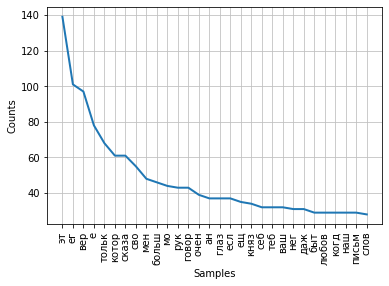

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [224]:
frequency_distribution.plot(30, cumulative=False)

In [225]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [226]:
%matplotlib inline

In [227]:
text_raw = " ".join(t)

In [228]:
word_cloud = WordCloud().generate(text_raw)

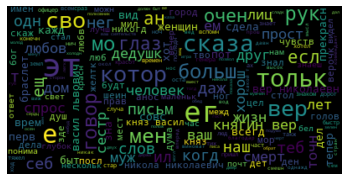

In [229]:
wordcloud = WordCloud(max_font_size=40).generate(text_raw)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2>Запись в файл</h2>

In [230]:
with open('result21.txt','w') as f:
    for key in frequency_distribution:
        f.write(key+' : '+str(frequency_distribution[key])+ '\n')
f.close()

<h1>Попробовала применить стеммер к списку стоп-слов</h1>

In [231]:
russian_stopwords_lem = stemmer.stemWords(russian_stopwords)
#Preprocess function
def preprocess_text3(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    stemmed_tokens = stemmer.stemWords(tokens)
    filtered_tokens = []
    for word in stemmed_tokens:
        if (word not in russian_stopwords_lem) and (word != " ") and (word not in punctuation):
            filtered_tokens.append(word)
    
    
    return filtered_tokens

In [232]:
t = preprocess_text3(txt)

In [233]:
from nltk import FreqDist
frequency_distribution = FreqDist(t)

for key in frequency_distribution:
    print(key, frequency_distribution[key])

вер 97
котор 61
сказа 61
рук 43
говор 43
очен 39
ан 37
глаз 37
княз 34
ваш 32
любов 29
наш 29
письм 29
слов 28
одн 27
никола 25
жизн 25
точн 24
княгин 24
николаевн 24
сестр 24
спрос 24
васил 24
прост 23
смерт 22
дом 21
муж 21
лет 21
лиц 21
человек 21
тво 21
дедушк 21
врем 20
николаевич 20
женщин 19
львович 19
дел 18
шеин 18
прекрасн 18
вид 18
перв 18
кажд 18
жен 17
сдела 17
зна 17
браслет 17
мил 16
люб 16
дела 16
чувств 16
голов 16
желтк 16
генера 15
душ 15
цел 14
мест 14
город 14
имен 14
любв 14
знал 14
анос 14
верочк 14
мор 13
ден 13
стол 13
дет 13
прав 13
ног 13
бог 13
дума 13
скаж 13
нескольк 12
маленьк 12
видел 12
понима 12
нам 12
красн 12
должн 12
час 12
стал 12
двер 11
минут 11
глубок 11
знаеш 11
свет 11
бел 11
ответ 11
вечер 11
люд 11
последн 11
случа 11
оста 11
поч 11
тяжел 10
ноч 10
дорог 10
част 10
всем 10
такж 10
ход 10
красот 10
хотел 10
быстр 10
стар 10
знает 10
ах 10
офицер 10
вспомн 10
свят 10
земл 9
сраз 9
тих 9
знаком 9
времен 9
пришл 9
благодар 9
давн 9
сем 9
стран 9

глубоко-глубок 1
ощущен 1
велич 1
усилива 1
ласково-спокойн 1
весело-син 1
светле 1
кос 1
полос 1
густо-син 1
лодк 1
отмеча 1
дрема 1
глад 1
недалек 1
трехмачтов 1
судн 1
сверх 1
дониз 1
однообразн 1
выпукл 1
ветр 1
стройн 1
парус 1
поража 1
торжествен 1
чуд 1
привыкн 1
дав 1
плоск 1
скуча 1
надоеда 1
ялт 1
кавалькад 1
уч-кош 1
лесничеств 1
водопад 1
попа 1
облак 1
поднима 1
оконч 1
пропаст 1
деревн 1
кажут 1
спичечн 1
коробк 1
травк 1
местност 1
спуска 1
географическ 1
повисл 1
вот-вот 1
полеч 1
легкост 1
оборачива 1
проводник 1
сеид-огл 1
почмока 1
эх 1
барин 1
мин 1
каж-д 1
сравнен 1
северян 1
прискуч 1
мхи 1
мухомор 1
атлас 1
вышит 1
бисер 1
сестренк 1
благоразумн 1
вереньк 1
дво 1
спохват 1
роман 1
природ 1
понрав 1
ручн 1
мешочк 1
записн 1
стерш 1
посеревш 1
син 1
вил 1
тускло-золот 1
филигра 1
сложност 1
тонкост 1
искусн 1
терпелив 1
прикрепл 1
тоненьк 1
нитк 1
замен 1
таблетк 1
слонов 1
кост 1
антикварн 1
лавочк 1
рыт 1
хлам 1
набрел 1
орнамент 1
придумыва 1
листочк 1
моллин 1


раскис 1
распространя 1
обманыва 1
лгат 1
заведом 1
истолковател 1
паяснича 1
декадентств 1
блестел 1
наполн 1
непролит 1
переста 1
джентльмен 1
чуткост 1
гот 1
услов 1
как-никак 1
пис 1
пиш 1
показыв 1
свидан 1
обяза 1
встревож 1
повернувш 1
убьет 1
газет 1
пачка 1
разобра 1
нынч 1
пишут 1
развернут 1
натолкнут 1
столбец 1
напечата 1
загадочн 1
самоубийств 1
контрольн 1
палат 1
дан 1
следств 1
самоубийц 1
ввид 1
показан 1
установл 1
акт 1
вол 1
отправля 1
предчувствова 1
трагическ 1
исход 1
сумасшеств 1
фруктов 1
беспокойств 1
росл 1
прикова 1
неведом 1
вряд 1
почтальон 1
интерес 1
политик 1
наук 1
философ 1
каким-т 1
клин 1
вреза 1
уезжа 1
напомн 1
существует 1
маниакальн 1
иде 1
вознаград 1
звер 1
растен 1
воплот 1
заполн 1
мечт 1
бред 1
стыж 1
ошибк 1
уед 1
усп 1
накле 1
марк 1
почтов 1
поруча 1
сожг 1
затоп 1
печк 1
сжига 1
укра 1
собран 1
запрет 1
программ 1
художествен 1
выставк 1
отреза 1
музыкальн 1
квартет 1
d-dur 1
утешен 1
покрасневш 1
вздут 1
скрыва 1
вмеша 1
вероятн 1
про

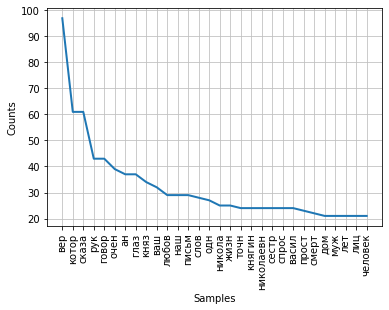

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [234]:
frequency_distribution.plot(30, cumulative=False)

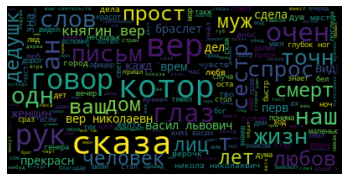

In [235]:
text_raw = " ".join(t)
wordcloud = WordCloud(max_font_size=40).generate(text_raw)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2>Запись в файл</h2>

In [236]:
with open('result22.txt','w') as f:
    for key in frequency_distribution:
        f.write(key+' : '+str(frequency_distribution[key])+ '\n')
f.close()